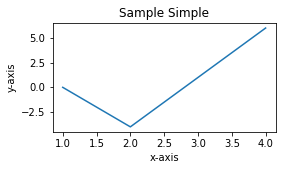

In [2]:
# jupyter için grafiklerin ve resimlerin direkt gözükmesini sağlar.
%matplotlib inline

import matplotlib.pyplot as plt

x = [1, 1.5, 2, 4]
y = [0, -2, -4, 6]

choice = 2

if choice == 0:
    plt.plot(x, y)
elif choice == 1:
    fig = plt.figure()
    ax = fig.add_subplot()
elif choice == 1:
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 1, 0.5]) # [x0, y0, width, height]
else:
    fig, ax = plt.subplots(figsize=[4,2])
ax.plot(x, y)
ax.set(title="Sample Simple", 
       xlabel="x-axis", 
       ylabel="y-axis")
fig.savefig("../../images/simple_plot.png")
plt.show()

# Numpy Grafik Verisi Oluşturma 
`ax` yerine direkt `((ax1, ax2), (ax3, ax4), (ax5, ax6))` yazılıp direkt değişkenle erişilebilir.

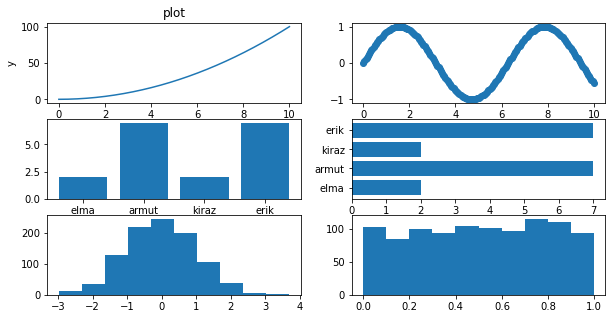

In [3]:
import numpy as np

x = np.linspace(0, 10, 200)
data = {"elma":  2, "armut": 7, "kiraz": 2, "erik":  7 }
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

# Plot data to each axis
ax[0, 0].plot(x, x**2);   # Normal Grafik
ax[0, 1].scatter(x, np.sin(x)) # Nokta Grafiği
ax[1, 0].bar(data.keys(), data.values())
ax[1, 1].barh(list(data.keys()), list(data.values())) # Y Ekseninde Veriler
ax[2, 0].hist(np.random.randn(1000))    # Normal Dağılım Histogram Grafiği (gauss dağilimi)
ax[2, 1].hist(np.random.random(1000))   # Histogram Grafiği

ax[0, 0].set(title = "plot", xlabel = "x", ylabel = "y"); # ";" koyma sebebi çıktının jupyter de vermesini engelemek

# Pandas Kullanımı

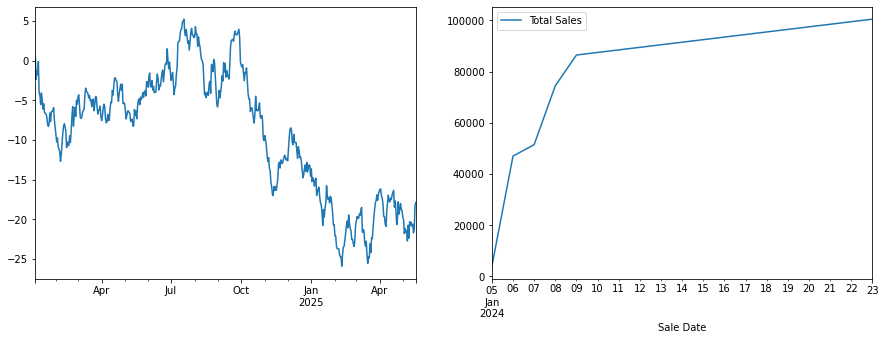

In [4]:
import pandas as pd
car_sales = pd.read_csv("car_data.csv")
car_sales[:5]

ts = pd.Series(np.random.randn(500),
               index=pd.date_range('1/5/2024', periods=500))

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# "cumulative sum" sırayıla toplayıp bir sonraki eleman oluşturulur
ts.cumsum().plot(ax=ax[0]); 

# Geçersiz karakterler düzeltilip sayının değeri düşürüdü
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales["Price"] = car_sales["Price"].str[:-2];

car_sales["Sale Date"] = pd.date_range("1/5/2024", periods=len(car_sales))
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales.plot(x='Sale Date', y='Total Sales', ax=ax[1]);

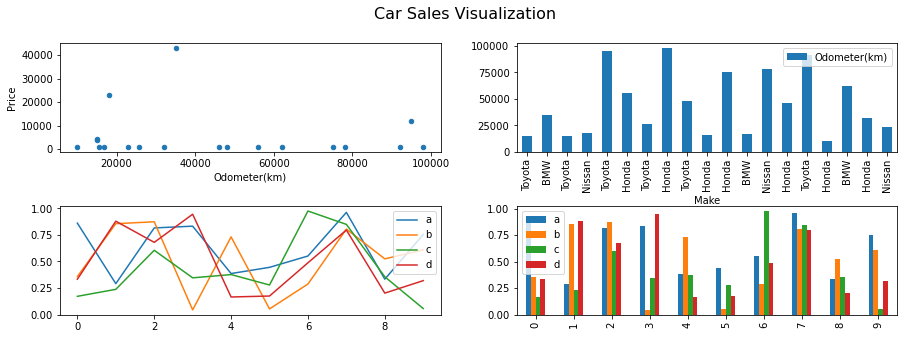

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
# fig2, ax2 = plt.subplots(ncols=2, figsize=(15, 5))

car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer(km)", y="Price", kind='scatter', ax=ax[0, 0]);

# kind ile grafik türü ayarlaması yapılabilir
car_sales.plot(x='Make', y='Odometer(km)', kind='bar', ax=ax[0, 1]); 

x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df.plot(ax=ax[1, 0])
df.plot.bar(ax=ax[1, 1]); # Ya da df.plot(kind='bar')
fig.subplots_adjust(wspace=0.2) 
fig.subplots_adjust(hspace=0.5) 
fig.suptitle("Car Sales Visualization", fontsize=16);

In [18]:
x = np.linspace(0, 10, 9) 
y = [(i * 2 if i %4 > 2 else i / 2) for i in x]
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

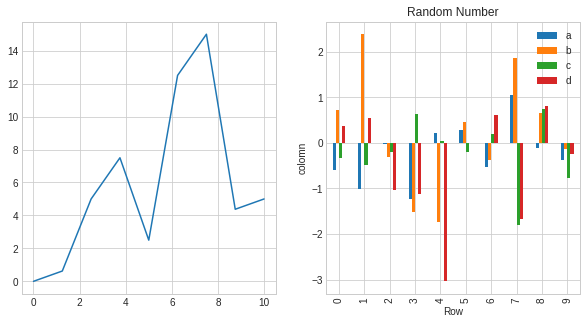

In [26]:
x = np.random.randn(10, 4) 
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

x1 = np.linspace(0, 10, 9) 
y1 = [(i * 2 if i %4 > 2 else i / 2) for i in x1]

plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x1, y1)

df.plot(kind="bar", ax=ax[1])
ax[1].set(title = "Random Number", xlabel="Row", ylabel="colomn")
ax[1].legend().set_visible(True)
plt.show()

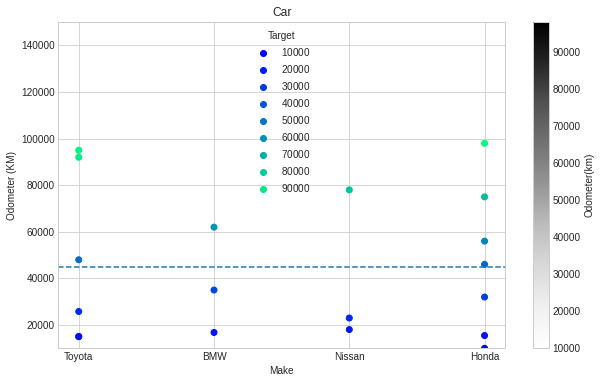

In [28]:
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
fix, ax = plt.subplots(figsize=(10, 6))

car_sales.plot(x="Make", y="Odometer(km)", c="Odometer(km)", kind='scatter', ax=ax) 
# c belirli bir veriye göre renk vermeyi sağlar. ax de belirli bir subplots  
# kalıbı içe aktarılabilir. Bu parametreler doldurulmaya bilir.
# ax.set_xlim([45, 56]) x ekseninde görülmesi istediğimiz alanı kaydeder.

scatter = ax.scatter(car_sales["Make"], car_sales["Odometer(km)"], 
                        c=car_sales["Odometer(km)"], cmap="winter") # cmap = color map renk ayarı verilmesi sağlanır

ax.set(title="Car", xlabel="Make", ylabel="Odometer (KM)")
ax.axhline(car_sales["Odometer(km)"].mean(), linestyle="--")
ax.legend(*scatter.legend_elements(), title="Target" )
ax.set_ylim([10000, 150000])
plt.show()